In [3]:
import healpy as hp, numpy as np, prjlib, curvedsky
import matplotlib.pyplot as plt

In [21]:
p, f, r = prjlib.analysis_init(t='la',freq='145')
w, __, __ = prjlib.window('la',2048,verbose=False)
Tcmb = 2.72e6
Tmap0 = hp.fitsfunc.read_map(f.cmb.nois[1],field=0,verbose=False)/Tcmb
Tmap = w * (Tmap0)

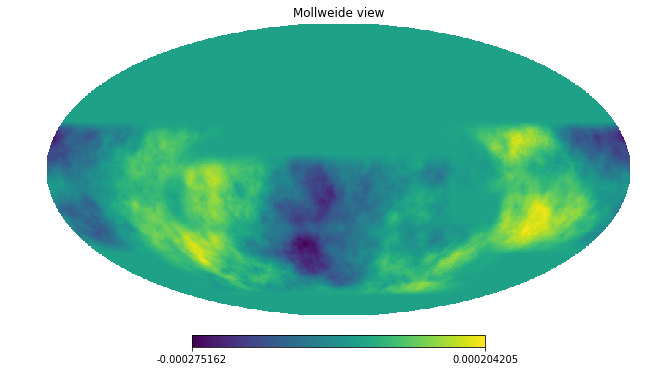

In [22]:
hp.mollview(Tmap)
plt.show()

In [7]:
import sys
sys.path.append('/global/homes/t/toshiyan/Work/Lib/actlib/PySM_public/')
sys.path.append('/global/homes/t/toshiyan/Work/Lib/actlib/so_pysm_models/')
sys.path.append('/global/homes/t/toshiyan/.local/cori/3.6-anaconda-4.4/lib/python3.7/site-packages/')
from mapsims import SONoiseSimulator
from mapsims import Channel
ch  = Channel(telescope='LA',band=145)
sim = SONoiseSimulator(4096,apply_beam_correction=False)
nT, nQ, nU = SONoiseSimulator.simulate(sim,ch)

In [48]:
lmax = 3000
nside = 2048
l = np.linspace(0,lmax,lmax+1)
Talm = curvedsky.utils.hp_map2alm(nside,lmax,lmax,Tmap)
cls = curvedsky.utils.alm2cl(lmax,Talm)

In [49]:
w0 = w.copy()
w0[w0 < 1e-3] = 0
walm = curvedsky.utils.hp_map2alm(nside,lmax,lmax,w0)
clw = curvedsky.utils.alm2cl(lmax,walm)

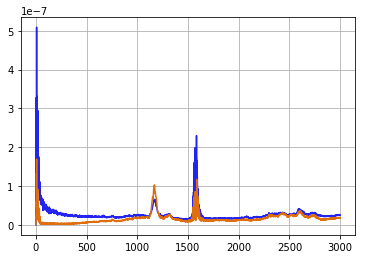

In [51]:
w2 = np.mean(w)
plt.plot(l,l**3*cls/w2)
plt.plot(l,l**3*clw*2*1e-4**2/w2)
#plt.xlim(1540,1620)
plt.grid(True)

In [ ]:
# healpy routine
alm = hp.sphtfunc.map2alm(Tmap,lmax=2048,pol=False)
L = np.linspace(0,2048,2048+1)
hcl = hp.sphtfunc.alm2cl(alm)
plt.plot(L,L**3*hcl)

In [ ]:
Fl = np.zeros((lmax+1))
Fl[1550:1600] = 1.
tmap = curvedsky.utils.hp_alm2map(12*nside**2,lmax,lmax,Talm*Fl[None,:])
hp.mollview(tmap,min=-3e-7,max=3e-7)
plt.show()

In [ ]:
Fl = np.zeros((lmax+1))
Fl[1300:1400] = 1.
tmap = curvedsky.utils.hp_alm2map(12*nside**2,lmax,lmax,Talm*Fl[None,:])
hp.mollview(tmap,min=-3e-7,max=3e-7)
plt.show()